# Assignment 2.

## Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialdataanalysis2020/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Monday March 30th, 2020 at 23:55. Hand in your files via [`http://peergrade.io`](http://peergrade.io/).

**Peergrading date and time**: _Remember that after handing in you have 6 days to evaluate a few assignments written by other members of the class_. Thus, the peer evaluations are due on Sunday April 5th, 2020 at 23:55. (The reason I'm asking you to do the peer evaluations on the sunday is that I want you to be able to enjoy the easter break fully.)

In [1]:
# load packages
import itertools
import numpy as np
import pandas as pd
from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource, FactorRange, Legend
from bokeh.transform import linear_cmap
from bokeh.palettes import Dark2_5 as palette
from bokeh.plotting import figure

## Part 1: Questions to text and lectures.

***A) Please answer my questions to the Segal and Heer paper we read during lecture 7 and 8.***

***

- **What is the *Oxford English Dictionary's* defintion of a narrative?**

*Answer*

***
- **What is your favorite visualization among the examples in section 3? Explain why in a few words.**

*Answer*

***
- **What's the point of Figure 7?**

*Answer*

***

- **Use Figure 7 to find the most common design choice within each category for the Visual narrative and Narrative structure (the categories within visual narrative are 'visual structuring', 'highlighting', etc).**

*Answer*

***
- **Check out Figure 8 and section 4.3. What is your favorite genre of narrative visualization? Why? What is your least favorite genre? Why?**

*Answer*

***

***B) Also please answer the questions to my talk on [explanatory data visualization](https://www.youtube.com/watch?v=yHKYMGwefso)***
***
- **What are the three key elements to keep in mind when you design an explanatory visualization?**

*According to the video, the key elements for designing an explanatory visualization are:*

   a) *To understand what is that we want to communicate. Thus, we start with a question regarding the outcome of the analysis and the message we want to convey to the audience via the visualizations.*
   
   b) *To allow exploration. It gives better understanding to users when it is allowed to investigate through the results by applying interactive visualizations.*
   
   c) *To know the intendend audiance of the results. Meaning, the explanation and consequently the visualizations of the results should be modified and presented accordingly (relevant to the audiences  technical expertise and interests).*

***

- **In the video I talk about (1) *overview first*,  (2) *zoom and filter*,  (3) *details on demand*.** 

  - **Go online and find a visualization that follows these principles (don't use one from the video).**
  
 <a href= "https://www.electricitymap.org/?wind=true"> This example </a> *contains all the above mentioned principles. It provides an overview of the electricity map around the world.*
   
   ***
  
  - **Explain how it does achieves (1)-(3). It might be useful to use screenshots to illustrate your explanation.**
 
  
   *With regards to the first principle " Overview first", by opening the above link, it is llustrated the map of the earth. In the map, the countries that are represented in colors are those that contain information regarding their electricity production and consumption. The rest are shown in grey. See screenshot below.*
  
  ![Eletricity map Overview](https://github.com/Narcissist1/SocialDataAnalysis-Assignments/raw/master/Electricity_map_overview.png)
  
   *The zoom option can be found on the up right corner of the page (see picture above). On the left of the page there is a filter option, where specific countries can be chosen. As well as specific filter to chose timeslot to get information about the electricity production/consumption in the chosen time for the chosen country. See an overview of the filter below.*
  
  ![Electricity map Zoom and filter](https://github.com/Narcissist1/SocialDataAnalysis-Assignments/raw/master/Electricity_map_filter.png)
  
  
   *The details on demand principle are represented in the map by choosing a country from the filter. Once a country has been chosen detailed information about the origin of electricity, the electricity prices and carbon intensity of the corresponding country are presented for every hour.Some details on demand are illustrated below for West Denmark*
  
  ![Electricity map Details on demand](https://github.com/Narcissist1/SocialDataAnalysis-Assignments/raw/master/Electricity_map_details.png)
  
  ![Electricity map Details on demand](https://github.com/Narcissist1/SocialDataAnalysis-Assignments/raw/master/Electricity_map_demand.png)
  
  ***
  
- **Explain in your own words: How is explanatory data analysis different from exploratory data analysis?**


 *Exploratory data analysis is the procedure where the data is undergo analysis in order to detect interesting patterns in the data like correlations among the variables or clusters that will help to answer questions regarding the dataset.*

 *Explanatory data analysis is the interpretation of the findings of exploratory data analysis. Explanatory data analysis involve the visual presentation of the results where clearly illustrated what has been found,as well as comments on the findings and reccomendations for improvements.*


## Part 2: Random forest and weather

The aim here is to recreate the work you did in Part 1 and 2 of the Week 7 lecture. I've phrased things differently relative to the exercise to make the purpose more clear. 

### Part 2A : Random forest binary classification.


Using the and instructions and material from Week 7, build a *random forest* classifier to distinguish between two types (you choose) of crime using on spatio-temporal (where/when) features of data describing the two crimes. When you're done, you should be able to give the classifier a place and a time, and it should tell you which of the two  types of crime happened there.


  - ***Explain about your choices for training/test data, features, and encoding. (You decide how to present your results, but here are some example topics to consider: Did you balance the training data? What are the pros/cons of balancing? Do you think your model is overfitting? Did you choose to do cross-validation? Which specific features did you end up using? Why? Which features (if any) did you one-hot encode? Why ... or why not?))***
  
  
 *Initially the two cime types were chosen. "BURGLARY" as crime type 1 and "FRAUD" as crime type 2.These are the target variables (y). Then the predictors (X) were chosen. The features used , as predictors, for this part are "Hour of the week" and "PD District". The hours of the week are correspond in total to 168 hours. While the number of districts is equal to 10.* 

 *The data were balanced in order in each crime type to have 10000 observations. Thus, two equal random samples were created. The reasone behind the creation of two eqaul samples is that in case one class has more observations than the other the classifier may be biased towards the majority class. In general imbalanced data may lead to false conclusions. However, in the present case, the sample size in both types has significantly reduced compare to the original one (undersampling) therefore some critical information may have lost.*

 *Later, prior to the distincition of the data in train and test data we performed one hot encoding to PD district feature. Thus, 10 more columns created with binary values(1,0). One appears when a chosen crimes occured in the corresponding district, otherwise zero is shown. The reasons, behind the one hot coding was firstly to turn the categorical data into integers since the classifier requires such data. Secondly, to avoid the model to assume natural ordering between the districts which may lead to poor performarnce.*
 
 *The data then splitted in X_test,y_test and X_train,y_train by assigning 50% of the data to the training dataset and 50% to the test dataset. Then RandomForestClassifier applied.*

 
 *In order to conclude whether the model is overfitting the accuracy score has to be compared witn the accuracy score of the test data. One way to avoid potential overfitting is to perform k-fold cross validation in order to optimize a tuning parameter that dominates the number of features that are randomly chosen to grow each tree from the bootstrapped data and choose the tuning parameter that minimizes test sample prediction error.* 
 
 *However, cross validation, wasn't performed neither for model selection nor for model evaluation.* 
 *As a result, it is not clear whether our model is overfitting or not.*
 
 
  ***
  
  - ***Report accuracy. Discuss the model performance.***
  
 *The accurancy of the model below is 61.68% (The classifier identify the correct class 61.68% of the time). Since, the dataset we used were balanced we can conclude that an average accurancy score has been achieved. It seems that the model can be improved further and increase the accuracy while at the same time decrease the error rate which in this case 38.32%. The fact that we used limited number of targeted variables plays vital role in the classifier's performance. Thus, in the following part more data have been added to the model to evaluate how the classifier performs when larger amount of predictors is used.*
  

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [3]:
allData = pd.read_csv("police.csv")
typeOneData = allData.loc[allData['Category'] == 'BURGLARY']
typeTwoData = allData.loc[allData['Category'] == 'FRAUD']
typeOneCopy = allData.loc[allData['Category'] == 'BURGLARY']
typeTwoCopy = allData.loc[allData['Category'] == 'FRAUD']

In [4]:
labelencoder = LabelEncoder()

#one hot encoding on the districts
pdNum = {key: index for index, key in enumerate(allData.PdDistrict.unique())}
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hours = ['00', '01', '02', '03', '04',  '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
hourOfWeek = {}
k = 1
for week in weekdays:
    for hour in hours:
        hourOfWeek[(week, hour)] = k
        k += 1

def getTrainData(df, sample=10000):
    df = df.sample(sample, replace=True)
    rv = []
    for index, d in df.iterrows():
        rv.append((hourOfWeek[(d.DayOfWeek, d.Time.split(':')[0])], pdNum[d.PdDistrict]))
    return rv

In [5]:
xData = []
yData = []
for label, df in enumerate([typeOneData, typeTwoData]):
    xData.extend(getTrainData(df))
    yData.extend([label] * 10000)

xData = np.asarray(xData, dtype=np.int32)
yData = np.asarray(yData, dtype=np.int32)

np.random.seed(0)
indices = np.random.permutation(len(xData))
x_train = xData[indices[:-5000]]
x_test = xData[indices[-5000:]]
y_train = yData[indices[:-5000]]
y_test = yData[indices[-5000:]]

In [6]:
clf = RandomForestClassifier()
clf = clf.fit(x_train, y_train)
res = clf.predict(x_test)

def testAcc(res, y_test):
    count = 0
    for predict, label in zip(res, y_test):
        if predict == label:
            count += 1
    return count * 1.0 / len(y_test)

print('predict accuracy is: ', testAcc(res, y_test) * 100, '%')

predict accuracy is:  61.68 %


### Part 2B: Info from weather features.



Now add features from weather data to your random forest. 
***

  - **Report accuracy.**
  
  *The accuracy is 74.36% and the error rate is 25.64%*


  
  ***
  - **Discuss how the model performance changes relative to the version with no weather data.**
  
  *After adding the weather data, the prediction accuracy improves over 10%, from 61% to 74% and consequently the error rate has a significatn drop. Obviously, the choice of relevant predictors is of high importance for the model's performance.*
  ***
  
  - **Discuss what you have learned about crime from including weather data in your model.**
  
  *Base on the common sense, we assume that there is a relation between the weather and one of the crime type(in our case it's BURGLARY), for example, criminals of burglary may not want to do their 'business' in a heavy rain day, but on the other hand, fraud crime is not constrained by the weather, since it can be done through cell phones or the Internet. The accuracy above confirms the assumption. After adding the weather data, the prediction accuracy improves over 10%.*

In [27]:
weatherData = pd.read_csv("weather_data.csv")
weatherData.rename({'date': 'Date'}, axis=1, inplace=True)

In [28]:
def parseDate(row):
    month, day, year = row.Date.split('/')
    hour = row.Time.split(':')[0]
    return '-'.join([year, month, day]) + 'T' + hour + ':00:00.000Z'

typeOneCopy['Date'] = typeOneCopy.apply(lambda row: parseDate(row), axis=1)
typeTwoCopy['Date'] = typeTwoCopy.apply(lambda row: parseDate(row), axis=1)

/Users/Mr_ren/.virtualenvs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/Mr_ren/.virtualenvs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [29]:
mergeOne = pd.merge(weatherData, typeOneCopy, how='inner', on='Date')
mergeTwo = pd.merge(weatherData, typeTwoCopy, how='inner', on='Date')
mergeOne['weather_code'] = labelencoder.fit_transform(mergeOne['weather'])
mergeTwo['weather_code'] = labelencoder.fit_transform(mergeTwo['weather'])

def getTrainWeatherData(df, sample=10000):
    df = df.sample(sample, replace=True)
    rv = []
    for index, d in df.iterrows():
        rv.append((hourOfWeek[(d.DayOfWeek, d.Time.split(':')[0])], pdNum[d.PdDistrict], d.weather_code))
    return rv

xData = []
yData = []
for label, df in enumerate([mergeOne, mergeTwo]):
    xData.extend(getTrainWeatherData(df))
    yData.extend([label] * 10000)


xData = np.asarray(xData, dtype=np.int32)
yData = np.asarray(yData, dtype=np.int32)

np.random.seed(0)
indices = np.random.permutation(len(xData))
x_train = xData[indices[:-5000]]
x_test = xData[indices[-5000:]]
y_train = yData[indices[:-5000]]
y_test = yData[indices[-5000:]]

In [30]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
res = forest.predict(x_test)
print('predict accuracy is: ', testAcc(res, y_test) * 100, '%')

predict accuracy is:  74.36 %


## Part 3: Data visualization

* Create the Bokeh visualization from Part 2 of the Week 8 Lecture, displayed in a beautiful `.gif` below. 


![Movie](https://github.com/suneman/socialdataanalysis2020/blob/master/files/week8_1.gif?raw=true "movie")

In [31]:
# load and filter data
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
data = pd.read_csv("police.csv")
data = data.loc[data['Category'].isin(focuscrimes)]
start_date = '01/01/2010'
end_date = '12/31/2018'
mask = (data['Date'] > start_date) & (data['Date'] <= end_date)
data = data.loc[mask]

In [32]:
hours = range(24)
prepData = {}
prepData['Hour'] = list(hours)
for crime in focuscrimes:
    tmp = data.loc[data.Category == crime]
    # all count for each crime type
    count = tmp.size
    hourCounts = []
    for hour in hours:
        strHour = str(hour)
        if len(strHour) == 1:
            strHour = '0' + strHour
        # normalizing data, calculate crime count for each hour and divide by the overall count
        hourCounts.append(tmp.loc[tmp.Time.str.startswith(strHour)].size * 1.0 / count)
    prepData[crime] = hourCounts

prepData = pd.DataFrame(prepData)

In [33]:
source = ColumnDataSource(prepData)
output_notebook()
colors = itertools.cycle(palette)
# create a figure to add data bars later
p = figure(x_range = FactorRange(factors=[str(hour) for hour in hours]), y_range=(0,0.2), 
           plot_height=400, plot_width=1000, title="Crimes Distribution", toolbar_location=None, tools="")
bar ={}
items = []
# iterate over the dataset to create bars
for indx, i in enumerate(focuscrimes):
    bar[i] = p.vbar(x='Hour', top=i, source=source, width=0.5, color=next(colors))
    items.append((i, [bar[i]]))

# create plot legend at put it on the left side
legend = Legend(items=items, location=(0, -30))
p.add_layout(legend, 'left')
p.legend.click_policy = "hide"
show(p)

Loading BokehJS ...

# Code description

**Provide nice comments for your code. Don't just use the `# inline comments`, but the full Notebook markdown capabilities and explain what you're doing.**

 *In the first block the data loading and filtering is preformed. All the crime categories in the focuscrime list have been selected and the time period has been set from January 2010 to Decemeber 2018.*

 *The preparation of data for plotting took place in the second block. For each crime type in the focuscrimes, calculate the sum of the crime type and also the number during each hour. The normalized value is hour data divided by overall data. For each crime type, storing the normalized value for each hour in 24 hours cycle in a list, then create a dataframe base on it.*

 *In the third block Bokeh was used to create an interacive plot. First converting the dataset from pandas dataframe to Bokeh ColumnDataSource and feed into Bokeh figure later. Then create a Bokeh figure as a container for the bars. For each crime type, we created a vbar and assigned it with a specific color. Finally, we created a legend for the plot to interact with.*

![Movie](https://github.com/Narcissist1/SocialDataAnalysis-Assignments/raw/master/bars.gif "movie")

# In case the gif link doesn't work

[Screen shot video](https://youtu.be/gX3S1f0Kr3I)

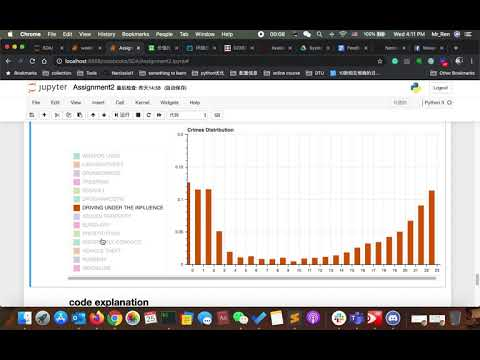

In [35]:
from IPython.display import YouTubeVideo
YouTubeVideo("gX3S1f0Kr3I",width=600, height=338)